# Turku AI Week Machine Learning Workshop 

## The Tutorial

The actual project we’ll be going through together involves handwriting recognition, or more precisely recognizing handwritten numbers. This is done by building a machine learning model called neural network. We’ll be using [MNIST database](http://yann.lecun.com/exdb/mnist/) of handwritten digits to train and test our machine learning model. The end result will recognize numbers with a good accuracy.

The project is roughly following the *[Chapter 1](http://neuralnetworksanddeeplearning.com/chap1.html)* of the book “Neural Networks and Deep Learning” by **Michael A. Nielsen** but also touches further chapters of that book. 

The outline of the tutorial is:

1. Understand what a neural network is (and isn't) and what it does.
2. Understand different (hyper)parameters of a neural network.
3. Run "plain" neural network code in Python.
4. Understand how to evaluate the performance of a machine learning model, neural networks included.
5. Try out different network parameters to see the effect on its performance.
6. See how the neural network handles your own handwriting!
7. If you have time, try out neural networks with [Keras](https://keras.io/).

The paragraphs starting in <span style="color: red"><b>bold red</b></span> are supposed to be explained by the coaches in the event.

### 1. What Is a Neural Network?

Let's go through basic concepts again.

Can you explain these concepts to your group?

<span style="color: red;"><b>Coaches:</b></span> Help participants to grok these key concepts.

### 2. The Parameters of Your Neural Network

Let's check the code here.

### 3. Run Neural Network Code in Python

Before you start with the neural network you need to load the training data (the MNIST data set). There is a loader included in the Python code. You can use it as follows:

In [3]:
# Here we are using Python3 so let's add that directory
# If you're running code straight from python3 or python2 directory you don't
# need to run this
import sys
sys.path.insert(0, '/Users/rintakumpu/OneDrive - O365 Turun yliopisto/ai-week-workshop/python3')

# Now we can import the loader and use it to read the data set
# You can simply run this from the command line in the right directory
# (that is wherever you cloned the neural network code)
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
test_data = list(test_data)

Now that we have loaded our training, validation and test data we can move on to train our network using these data sets.

In [4]:
# This loads the neural network discussed in the Chapter 1 of the Neural Networks and Deep Learning book
import network

**Before proceeding further**, open the corresponding Python file `network.py` and try to figure out how it works. In pairs, try to explain this to each other. Once you have a pretty good grasp on how this program functions, try creating an object based on the class included in the file. Neural networks used here require Python [NumPy](http://www.numpy.org/) library. If you have installed Anaconda, you should already have this library installed on your machine.

In [5]:
net = network.Network([784, 30, 10])

Once you have the object created, check out the stochastic gradient descent method (`SGD`) within the class. See what parameters it takes so that you have an idea what's happening on the line below. Inputing test data as a parameter will evaluate the performance of the network after each epoch, making the training slower. If it's too slow, remove the test data parameter.

In [6]:
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0 : 9117 / 10000
Epoch 1 : 9250 / 10000
Epoch 2 : 9323 / 10000
Epoch 3 : 9354 / 10000
Epoch 4 : 9368 / 10000
Epoch 5 : 9378 / 10000
Epoch 6 : 9360 / 10000
Epoch 7 : 9413 / 10000
Epoch 8 : 9427 / 10000
Epoch 9 : 9399 / 10000
Epoch 10 : 9460 / 10000
Epoch 11 : 9439 / 10000
Epoch 12 : 9457 / 10000
Epoch 13 : 9443 / 10000
Epoch 14 : 9451 / 10000
Epoch 15 : 9471 / 10000
Epoch 16 : 9440 / 10000
Epoch 17 : 9454 / 10000
Epoch 18 : 9443 / 10000
Epoch 19 : 9466 / 10000
Epoch 20 : 9475 / 10000
Epoch 21 : 9449 / 10000
Epoch 22 : 9471 / 10000
Epoch 23 : 9468 / 10000
Epoch 24 : 9503 / 10000
Epoch 25 : 9495 / 10000
Epoch 26 : 9431 / 10000
Epoch 27 : 9483 / 10000
Epoch 28 : 9483 / 10000
Epoch 29 : 9484 / 10000


### 4. Evaluating The Performance of Your Neural Network

Once the network has trained for the 30 epochs (or whatever you had inputted as a parameter!), it's time to evaluate network's performance. Let's run:

In [7]:
net.evaluate(test_data)

9484

Based on this measure, how well did the neural network fare? If you used `test_data` parameter when training the network, how much did the number of epochs affect the classification accuracy?

<span style="color: red;"><b>Coaches:</b></span> Discuss accuracy and other measures of goodness. Mention overfitting too.


### 5. How Parameters Affect The Performance of Your Neural Network

Try training the network with different parameters, see how this affects the training time and accuracy. You can also try out more complex types of neural networks found from files `network2.py` and `network3.py` to see how they compare.

### 6. Use Neural Network to Identify Your Own Handwriting

As you have probably already noticed, the neural network doesn't directly accept image input. It also requires the images entered to it to be of certain dimensionality (namely 28 by 28 = 784 pixels).

In this section we'll work around this problem and see how our network actually works on our handwriting. I've written down and photographed my own phone number for this exercise. I've already turned it into grayscale and enhanced the contrast a bit.

![0401968642](img/phone_number.jpg)

Now, first we need a program to read the digits into the format accepted by our neural network. 

The network we trained only accepts 28x28 grayscale images of a single digit at the time. In order to make the image acceptable to the network, we need to split it up into one-digit parts. There are some statistical methods how to do this automatically, but here I've just gone down the manual route. This results with ten files I've named from `number0.jpg` to `number9.jpg`. 

![0](img/number0.jpg) ![4](img/number1.jpg) ![0](img/number2.jpg) ![1](img/number3.jpg) ![9](img/number4.jpg) ![6](img/number5.jpg) ![8](img/number6.jpg) ![6](img/number7.jpg) ![4](img/number8.jpg) ![2](img/number9.jpg)

The numeral suffix of the file name of course doesn't have anything to do with the actual number contained in the file. 

<span style="color: red;"><b>Coaches:</b></span> Present some ideas how you could do the image splitting automatically. As an additional excercise participants can explore these.

Having created these ten files we can easily first rescale them to 28 by 28 pixels and then read the grayscale values into vectors of length 784 that can be used as an input for our neural networks. We're going to use functions from Python [Pillow](https://pillow.readthedocs.io/en/latest/#) library to manipulate the images. If you have Anaconda installed, you should already have this package. If not, with [pip](https://pypi.python.org/pypi/pip) packet manager installed you can install Pillow this simply by typing `pip install pillow` on command line.

In [8]:
from PIL import Image

# First
# Resize images to 28 by 28 pixels for neural network
size = (28, 28)

infile_list = []
for i in range(0,10):
    infile_list.append("img/number"+str(i)+".jpg")
    
for infile in infile_list:
    outfile = infile + ".thumbnail.jpg"
    if infile != outfile:
        try:
            im = Image.open(infile)
            im = im.resize(size) # Resizes image
            im = im.convert(mode="L") # Converts to grayscale
            im.save(outfile, "JPEG")
        except IOError:
            print("Cannot resize image", infile)

In [9]:
# Next read the thumbnail files into vectors
# We'll use imageio package https://pypi.python.org/pypi/imageio
# to do this.

# This is something you should already have installed on your machine (if you used Anaconda)
# Otherwise run
# pip install imageio 
# on the command line and/or consult the coaches

import imageio
from numpy import array
from numpy import ravel
from numpy import transpose
from numpy import int64

# Array for the phone number data
phone_number_data = []
phone_number_string = "0401968642"

for i in range(0,10):
    infile_this = "img/number" + str(i) + ".jpg.thumbnail.jpg"
    im = imageio.imread(infile_this)
    im_vector = ravel(array([im])) # Vector of pixel grayscale values 0-255
    # The neural network wants the data in decimal format:
   
    im_vector = transpose(array([((255-im_vector)/255)-0.3])) # Let's increase the contrast a bit.
    im_vector[im_vector < 0] = 0
    im_array = tuple([im_vector,int64(phone_number_string[i])])
    
    # Then let's add tuple into a list
    phone_number_data.append(im_array)

All the above code is a demonstration that when doing any kind of data science stuff, you have to spend a lot of time just wrangling your data into the right format. Let's check how the images of our numbers look now.

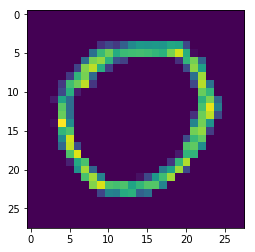

In [10]:
from numpy import reshape
import matplotlib.pyplot as plt # import
plt.imshow(phone_number_data[0][0].reshape((28,28)))
plt.show()

Now that we got our numbers into the format the neural network actually accepts, it's time to see how it performs.

In [11]:
net.evaluate(phone_number_data)

7

Without actually seeing a single specimen of my digits the network gets most of them right. 
**Why didn't it predict all of them correctly?** 
**Can you get your network to perform better?** 
Also, there doesn't seem to be a method for actually outputting the predictions made by the network. **Write one**.

### 7. Try Out Neural Networks with Keras

Once you have downloaded and installed [Keras](https://keras.io) you can try replicating some of the neural networks you have been working on with this framework. Keras is not included in Anaconda distribution, so you have to get it yourself. If you have [pip](https://pypi.python.org/pypi/pip) packet manager installed you can do this simply by typing `pip install keras` on command line. You will also need [TensorFlow](https://www.tensorflow.org/), so get it by typing `pip install tensorflow`.

Below is some Keras code to get you started.

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation
